# Set Up

In [6]:
import pandas as pd
import numpy as np
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use("seaborn")

C:\Users\leopo\AppData\Local\Temp\ipykernel_1072\2608210481.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [7]:
import spotiscience as sps

# Credentials

In [8]:
client_id = 'fddfd9d30faf4b6d9a4b1d804aff7fa1'#'13d13dd56e594a21b4d4ec40c0a88691'
client_secret = 'ff2187c009ce4e5ab7ed20bb03c21258'#'d30d08b33f0d4e42b54f61235131f289'
redirect_url = 'http://localhost:8080/oauth/return'
userid = 'draskeglom' #'e1c5a23f94234d10' #faq?si=e1c5a23f94234d10 #4f66346ab1a042a2
genius_access_token = 'ao_WTdM2aSzfIP9-UAqwbw7sQKKq0i_R_Sk6aLUxWUtePkA-xrd4CKq1hAI4_Zej'

playlist = 'https://open.spotify.com/playlist/1UseUQhEDVhhHwfXxiVzP2?si=11a972b658a449c1' # the playlist we are going to use

# Downloader

## Set Up

In [9]:
#create a dictionary with authorization keys
CREDENTIALS = {}
CREDENTIALS['client_id'] = client_id
CREDENTIALS['client_secret'] = client_secret
CREDENTIALS['redirect_url'] = redirect_url
CREDENTIALS['user_id'] = userid
CREDENTIALS['genius_access_token'] = genius_access_token # genius is optional, only

"""You also can set your credentials id on credentials.py and import from spotiscience"""

# returns 'downloader class'
sd = sps.downloader.SpotiScienceDownloader(credentials=CREDENTIALS)


# Basic features

## Playlist download

In [10]:
#Return song features of playlist
len_playlist=50
playlist_data = sd.get_playlist_song_features(playlist_id=playlist,n_songs=len_playlist)

Playlist fusion downloaded!


In [11]:
song = playlist_data['fusion'][0]

## Artist info

In [12]:
# On peut obtenir des informations des artistes directement
# problème : demande à chaque fois l'autorisation so meh for automatisation
artist = 'metallica'
sd.get_artist_information(artist=artist)

{'artists': {'href': 'https://api.spotify.com/v1/search?query=metallica&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2ye2Wgw4gimLv2eAKyk1NB'},
    'followers': {'href': None, 'total': 22832459},
    'genres': ['hard rock',
     'metal',
     'old school thrash',
     'rock',
     'thrash metal'],
    'href': 'https://api.spotify.com/v1/artists/2ye2Wgw4gimLv2eAKyk1NB',
    'id': '2ye2Wgw4gimLv2eAKyk1NB',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eb69ca98dd3083f1082d740e44',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab6761610000517469ca98dd3083f1082d740e44',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f17869ca98dd3083f1082d740e44',
      'width': 160}],
    'name': 'Metallica',
    'popularity': 81,
    'type': 'artist',
    'uri': 'spotify:artist:2ye2Wgw4gimLv2eAKyk1NB'}],
  'limit': 1,
  'next': 'http

## Prediction : mood and topics, examples on one song

In [13]:
# returns 'predicter class'
sp = sps.SpotiSciencePredicter()

### Mood

In [14]:
#returns the tag of mood 
mood = sp.predict_song_mood(song=song)
song['mood'] = mood

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.3. This might lead 

### Get Song Genre

In [15]:
genre = sd.get_song_music_genre(song_id=song['id'])
song['genre'] = genre

### Lyrics topics prediction

#### Get Lyrics

In [16]:
lyrics = sd.get_song_lyrics(songname=song['name'],artistname=song['artist'])

Searching for "Bones" by Peter Bjorn and John...
Done.


The topic prediction of song lyrics uses any of the algorithms Latent Dirichlet Allocation Model (LDA), Non Negative Matrix Factorization Model (NMF) or Latent Semantic Indexing Model (LSI). To do this, I based my code on the following article which you can read here.

To predict the topic of lyrics you must configure the following parameters:

lyric = the lyric of the song

model = the model to use [options are “lsi”,”lda” or “nmf”]

lang = language of the song lyric [options are “english” or “spanish”]

n_grams = number of subsence of words to group

n_topics = number of returned topics

top_n = number of words per returned topic

For more information about the parameter n_grams, you can read the official documentation about vectorization with sklearn by clicking here

#### Recognize language and topics

There is a necessity to add errors handling for topics : not every song has lyrics avaible, nor every lyrics is in french, english, spanish or german.

In [19]:
languages = {
    'en' : 'english',
    'fr' : 'french',
    'es': 'spanish',
    'de': 'german'
}

In [20]:
lyrics = sd.get_song_lyrics(songname=song['name'],artistname=song['artist'])
model = 'lda' # (available type 'lda', 'lsi', 'nmf')
lang = languages[detect(lyrics)] # (available type 'english','spanish', 'french', 'german')
# check for the last one.
# using langdetect detect function to identify the language
# need to had a error gestion regarding the language, if the lyrics can't be identify in those
# or install the core relevant to the language
n_grams = (1,1)
n_topics = 1
top_n = 5
topics = sp.predict_topic_lyric(lyrics,model,lang,n_grams,n_topics,top_n)
song['topics'] = topics

Searching for "Bones" by Peter Bjorn and John...
Done.


c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Example on a whole playlist : downloading and extracting data

In [21]:
sp = sps.SpotiSciencePredicter()

In [22]:
languages = {
    'en' : 'english',
    'fr' : 'french',
    'es': 'spanish',
    'de': 'german'
}
name = 'fusion' # name of the playlist u want to extract the predictions from
len_playlist = 828

In [23]:
#Return song features of playlist
playlist_data = sd.get_playlist_song_features(playlist_id=playlist,n_songs=len_playlist)
playlist_data

Playlist fusion downloaded!


In [24]:
for song in playlist_data[name]:

    mood = sp.predict_song_mood(song=song)
    song['mood'] = str(mood)

    genre = sd.get_song_music_genre(song_id=song['id'])
    song['genre'] = genre
    

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.3. This might lead 

In [25]:
df_playlist = pd.DataFrame.from_records(playlist_data[name])

In [26]:
collected_genre = df_playlist['genre'].sum()

<AxesSubplot: >

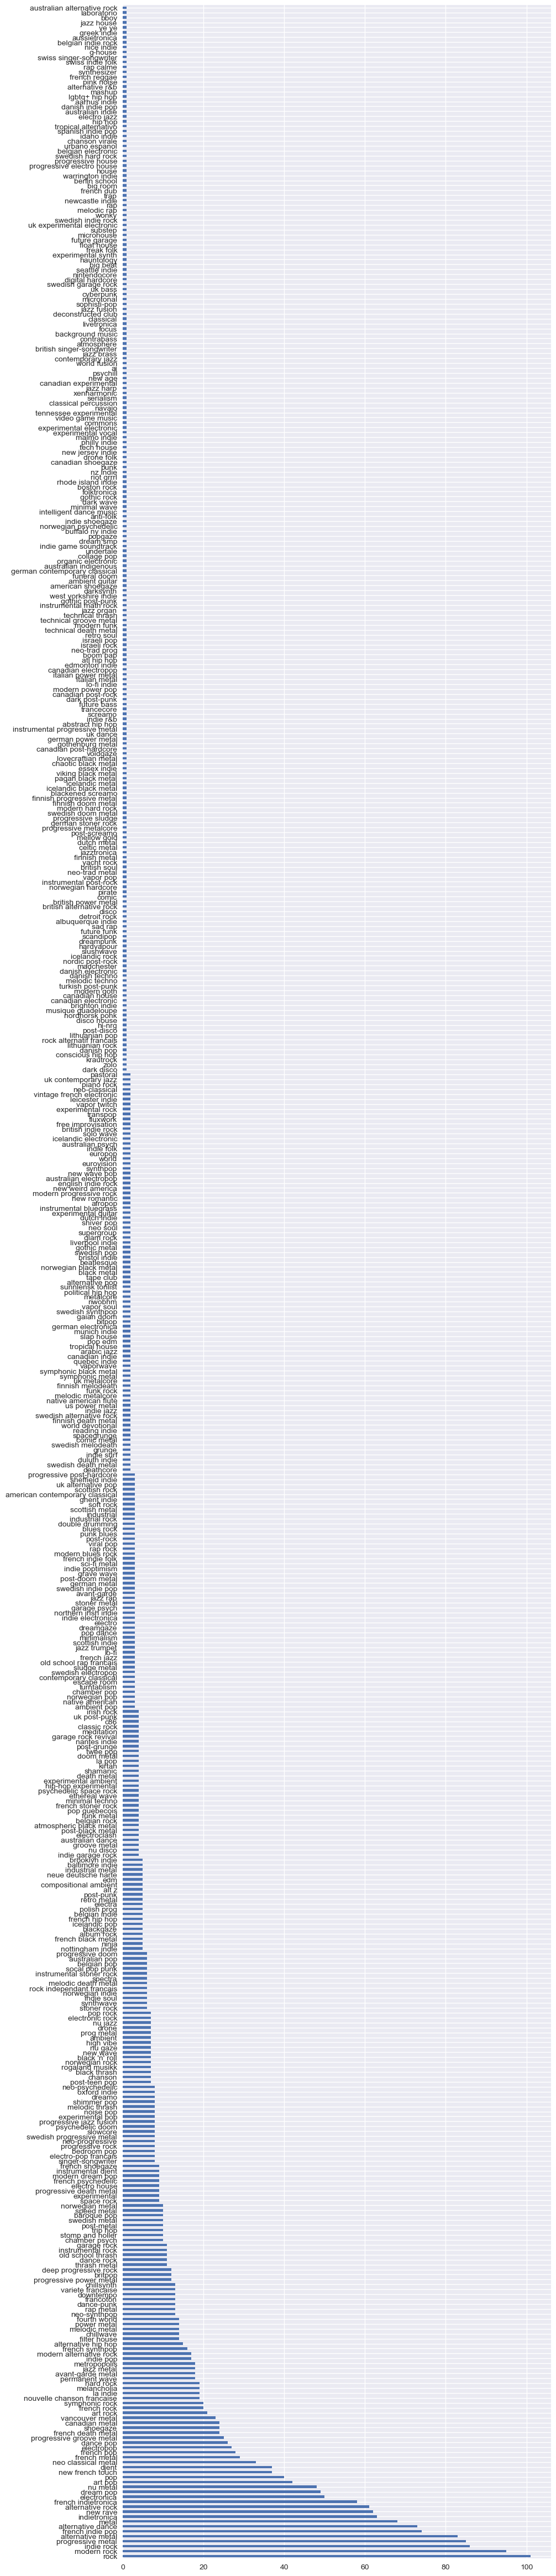

In [27]:
fig = plt.figure()
fig.set_size_inches(10,60)
pd.Series(collected_genre).value_counts().plot.barh()

On retient en genre les suivants :
- jazz ou funk
- pop
- electro ou techno ou club ou tronica
- synth
- rock
- prog ou exp
- alt
- dance, rave


In [28]:
selfdefined_genre = ['jazz,funk','pop','electro,tronica','techno,club','house','synth,dream','rock','prog,exp','alt,modern','dance,rave','rap','franc','ind']
for genre in selfdefined_genre:
    df_playlist[genre] = ''

In [29]:
# identification of the song 49 (50th) to the chosen genres
song = df_playlist.iloc[49]
for genre in selfdefined_genre:
    subgenre = genre.split(',')
    b = False
    for sub in subgenre:
        for song_genre in song['genre']:
            b = b or (sub in song_genre) #we test if in the str of the genre of the song we find an occurence of our subgenre

['arabic jazz', 'french jazz', 'jazz trumpet']
jazz,funk True
pop False
electro,techno,club,tronica False
synth,dream False
rock False
prog,exp False
alt,modern False
dance,rave False


In [30]:
# identification for every song
for genre in selfdefined_genre:
    rows_in_genre = []
    for song_genre in df_playlist['genre']:
        subgenre = genre.split(',')
        b = False
        for sub in subgenre:
            for song_subgenre in song_genre:
                b = b or (sub in song_subgenre) #we test if in the str of the genre of the song we find an occurence of our subgenre
        rows_in_genre.append(b)
    df_playlist[genre] = rows_in_genre


In [31]:
df_playlist.sample(3)

,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,mood,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave"
74,7oUl2ZgCBvZ7xTIAdpFP2F,Tigress,H-Burns,Midlife,2019-03-29,37,207133,0.176,0.607,0.760,...,happy,[french indie folk],False,False,False,False,False,False,False,False
343,77VTRyFL3Pn76BoO6CGuFi,Ide Were Were,Freedom Café,Cantos De Medicina,2016-06-03,40,261770,0.893,0.401,0.328,...,sad,[shamanic],False,False,False,False,False,False,False,False
358,5MFZIkSSZd63sJ4BOu5jb4,Shine a Light,Spiritualized,Lazer Guided Melodies,1992-03-30,41,434906,0.103,0.264,0.369,...,calm,"[alternative rock, art pop, britpop, noise pop...",False,True,False,False,True,False,True,False


### Amelioration
An idea for amelioration is to use another source for the genres.

Another idea is to implement the same kind of summary for the topics

# Clustering

In [32]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [33]:
df_playlist.keys()

Index(['id', 'name', 'artist', 'album', 'release_date', 'popularity', 'length',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood', 'genre', 'jazz,funk', 'pop',
       'electro,techno,club,tronica', 'synth,dream', 'rock', 'prog,exp',
       'alt,modern', 'dance,rave'],
      dtype='object')

In [34]:
df_clustering = df_playlist[['popularity', 'length',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo','mood']+selfdefined_genre]
# a question can be ask about popularity
numvar = ['popularity', 'length',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo']

## Numeric Clustering

In [262]:
df_clustering[numvar].sample(3)

,popularity,length,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo
588,6,187480,0.005700,0.745,0.876,0.000001,0.147,0.931,-5.655,0.0285,115.978
622,42,178000,0.000749,0.192,0.981,0.000000,0.241,0.584,-2.529,0.0843,192.554
467,30,250692,0.306000,0.675,0.472,0.000009,0.119,0.205,-11.522,0.2690,92.966


c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarn

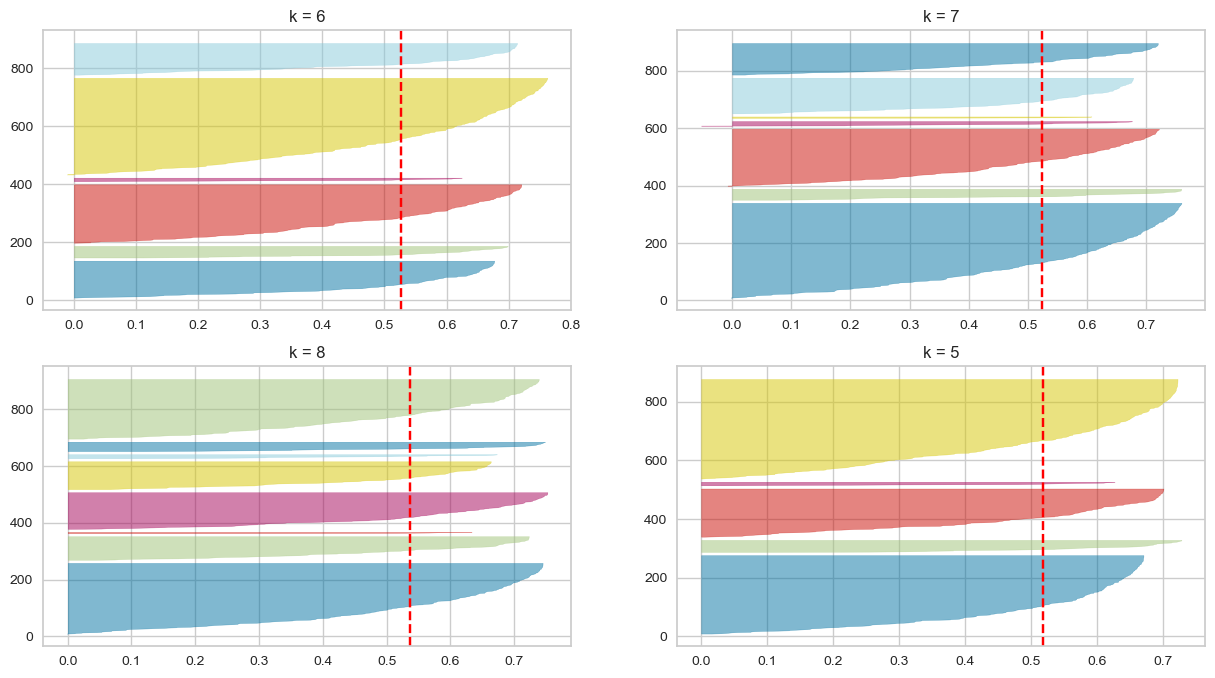

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
j=0
for i in [5,6,7,8]:#[3, 4, 6, 10]:
    j += 1
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(j, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    ax[q-1][mod].set_title("k = " + str(i))
    visualizer.fit(df_clustering[numvar])


## Numeric and Categorical clustering

Since we made a lot of work to predic a mood and some genre, we must try to use those categorical variables, which we can't do with K-Means.
So first I based the following code on [Jorge Martin Lasaosa post](https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad) about Gower Distance, check it out.

Gower distance $ ps_{ij}^{(f)} $ between $i$ and $j$ for the variable $f$ is : 
- for a numeric type : $ ps_{ij}^{(f)} = 1 - |x_{if}-x_{jf}|/R_{f} $ avec $ R_f = \max f - \min f $
- For a categorical feature, the partial similarity between two individuals is one only when both observations have exactly the same value for this feature. Zero otherwise.

In [37]:
import gower

In [38]:
# we compute this distance explained above
distance_matrix = gower.gower_matrix(df_clustering)

In [261]:
pd.DataFrame(distance_matrix).sample(3)

,0,1,2,3,4,5,6,7,8,9,...,818,819,820,821,822,823,824,825,826,827
206,0.362304,0.313159,0.335386,0.224104,0.192909,0.260015,0.349147,0.244436,0.390202,0.326283,...,0.234752,0.270745,0.262503,0.274612,0.348814,0.313831,0.380290,0.288674,0.273602,0.321925
716,0.265051,0.206304,0.248113,0.287972,0.427862,0.300782,0.248044,0.134428,0.392628,0.208345,...,0.354694,0.276847,0.305210,0.214837,0.271188,0.297889,0.296012,0.289339,0.275972,0.299634
526,0.296252,0.315000,0.317940,0.218483,0.110820,0.268687,0.328819,0.233725,0.288665,0.312324,...,0.216276,0.304898,0.302649,0.321124,0.373568,0.336910,0.393816,0.291411,0.267381,0.296368


### With clustering DBScan

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN

#km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
dbscan_cluster = DBSCAN(eps=0.11, 
                    min_samples=2, 
                    metric="precomputed")
q, mod = divmod(j, 2)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(dbscan_cluster, colors='yellowbrick', ax=ax[q-1][mod])
ax[q-1][mod].set_title("k = " + str(i))
dbscan_cluster.fit(distance_matrix)


DBSCAN(eps=0.11, metric='precomputed', min_samples=2)

In [41]:
df_clustering["cluster"] = dbscan_cluster.labels_

C:\Users\leopo\AppData\Local\Temp\ipykernel_1072\2529867548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering["cluster"] = dbscan_cluster.labels_


Number of clusters :

(-1 = outliers)

In [42]:
df_clustering['cluster'].nunique()

9

Number of song by cluster

In [43]:
for i in range(-1, df_clustering['cluster'].nunique()):
    print(len(df_clustering[df_clustering['cluster']==i]))

41

plutôt échec : tout est dans le premier cluster

Trying with another clustering methods : AffinityPropagation. Results are corrects

In [53]:
#from sklearn.cluster import SpectralClustering essayé fonctionne très mal
from sklearn.cluster import AffinityPropagation

In [54]:
#choosen_model = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=2000, random_state=100)# 200,42
choosen_model = AffinityPropagation(damping = 0.5, affinity='precomputed', max_iter=1000)
# idée assigné des points au musique en fonction de mon nombre d'écoute => voir la doc dans preference

In [55]:
results = choosen_model.fit(distance_matrix)

In [56]:
df_clustering['cluster'] = results.labels_

C:\Users\leopo\AppData\Local\Temp\ipykernel_1072\674743309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = results.labels_


## Analysing results

Number of clusters : (and in the idea the number of playlist)

In [57]:
df_clustering['cluster'].nunique()

18

How many songs by playlist :

In [58]:
for i in range(10):
    print(f"For the cluster {i}, there are {len(df_clustering[df_clustering['cluster']==i])} songs")


For the cluster 0, there are 12 songs
For the cluster 1, there are 25 songs
For the cluster 2, there are 21 songs
For the cluster 3, there are 63 songs
For the cluster 4, there are 21 songs
For the cluster 5, there are 23 songs
For the cluster 6, there are 185 songs
For the cluster 7, there are 57 songs
For the cluster 8, there are 37 songs
For the cluster 9, there are 48 songs


What kind of characteristics has each cluster : 

In [59]:
df_clustering.groupby('cluster').sum()

C:\Users\leopo\AppData\Local\Temp\ipykernel_1072\1973429802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clustering.groupby('cluster').sum()


,popularity,length,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave"
cluster,,,,,,,,,,,,,,,,,,,
0,353,3581136,3.789990,7.0410,7.96300,9.149000,1.3176,2.8711,-113.152,0.4612,1426.872,0,1,3,11,1,1,1,1
1,1018,8164688,1.239018,9.1420,20.47900,14.919100,4.4816,5.1632,-166.222,2.0144,2851.929,0,1,2,0,8,17,24,1
2,724,4577726,13.926360,12.1380,10.02700,10.432508,2.9926,10.2420,-240.967,1.1786,2556.618,1,14,2,10,1,3,1,1
3,1702,22782079,3.060017,23.6647,49.26260,27.256977,18.5362,14.4386,-437.722,4.3768,7805.704,3,1,2,1,1,42,8,1
4,804,5738345,11.332573,10.1110,9.72200,7.347369,3.7360,6.7866,-244.346,1.1613,2556.191,1,20,3,13,18,4,2,1
5,1090,6092951,3.459391,14.5940,16.49700,2.808606,3.9276,15.7076,-144.252,0.8725,2782.153,0,1,22,1,22,1,22,21
6,7927,41832691,28.563089,116.8033,126.31590,19.120905,33.7056,88.8806,-1270.431,13.1947,22788.042,1,150,75,23,6,2,54,41
7,2496,13228397,4.714490,29.8980,44.63490,6.549409,11.8770,29.1841,-344.963,4.5252,6414.119,1,2,1,3,46,1,54,12
8,990,9120632,3.097059,22.4990,25.75250,5.663710,5.6934,20.8280,-283.138,2.7285,4678.956,2,10,10,1,21,1,1,2


We can also see for each cluster what is the central track

In [61]:
df_playlist.iloc[results.cluster_centers_indices_]

,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,mood,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave"
119,2akjLHnHjDGsgqxuf48VYs,The Bay,Metronomy,The English Riviera,2011-04-11,61,290173,0.587000,0.8030,0.4700,...,happy,"[alternative dance, electronica, indie rock, i...",False,True,True,False,True,False,True,True
158,587Ki3uFlBXVZ9UY6S0IQy,Ligne 12,CHATON,VIE,2021-04-16,11,207346,0.645000,0.9410,0.1410,...,sad,[electro-pop francais],False,True,True,False,False,False,False,False
175,1jJci4qxiYcOHhQR247rEU,Kids,MGMT,Oracular Spectacular,2007-12-14,77,302840,0.000760,0.4510,0.9310,...,energy,"[alternative dance, indietronica, modern rock,...",False,False,True,False,True,False,True,True
235,6A6qBFJHid4WutQu6HHEZt,Walking On A Dream,Empire of the Sun,Walking On A Dream (Special Edition),2009-01-01,56,198440,0.245000,0.8700,0.6990,...,happy,"[alternative dance, australian dance, australi...",False,True,True,True,True,False,True,True
247,3gcmn2CtOE9SjBevmvGVEk,D.A.N.C.E - Radio Edit,Justice,D.A.N.C.E,2007-04-30,54,211880,0.052300,0.5910,0.9610,...,energy,"[alternative dance, electro house, electronica...",False,False,True,False,False,False,True,True
309,1dl1I6nRr3lFuFxP7gHtcx,So Humble the Afternoon,Julia Holter,So Humble The Afternoon,2020-10-12,32,322840,0.807000,0.2380,0.2250,...,calm,"[art pop, chamber psych, collage pop, dream po...",False,True,False,True,False,True,False,False
314,5DiwyUEb7jG8iVOaHYMEgl,Wind On Wind,Robert Fripp,Evening Star,1975,40,193280,0.972000,0.0843,0.0589,...,calm,"[ambient, ambient guitar, art rock, experiment...",True,False,False,False,True,True,False,False
321,5JTRbD6x9nnYh3mrrK3kcR,Suite Pour L'invisible,Ana Roxanne,Because of a Flower,2020-11-13,41,421463,0.837000,0.1340,0.0529,...,calm,"[art pop, experimental electronic, fourth worl...",False,True,True,False,False,True,False,False
338,35VfLKymw2iZKWnLTvm8Xv,Alien Observer,Grouper,A I A: Alien Observer,2011-04-11,52,236480,0.994000,0.2190,0.0825,...,calm,"[ambient, ambient pop, art pop, dream pop, dro...",False,True,False,True,False,True,True,False
355,6zjN6BuzpfvgRg4JNR3oMI,In a Landscap: (1948),John Cage,Daughters Of The Lonsome Isle,1994-01-01,3,469373,0.994000,0.2660,0.0184,...,calm,"[american contemporary classical, avant-garde,...",False,False,False,False,False,True,False,False


# Adding for each cluster a playlist and let's see if it's correct in any way (probably not), need a chromium based web browser as default browser
(or at least crash on firefox)

In [252]:
nb_playlist = df_clustering['cluster'].nunique()

In [253]:
U2FsdGVkX1/Dr36Htbd0NHeSyt7zcwtOQAlJhOZtI448GRilIUDqUXbG2VcrJ3P9vptgDzKVDtdT4Oem
8or4aSpWtATxKVoPB0zFaiDwvO9xGZ3LMmczFu4VdpSm41KwAVd47tUU3rB6GYnBfBbLgglun0vTKlp0
EkSa+Nf8A3paQIcCKVIjvQFD4jUyIdqucqh+De+Q83QfBXsawCoByXTbVrMeA+KClO6eFO5yvh8cc0GS
Xa/ulwOiGLIZR94ZatZNG4HHOHdPnFlJ5VS48olv0FzUV9tXom/9omdtF+Qm2nragQ30nfMQUG4q56Dl
D2bCxpM7LHcqUeyt8rtDCGKvLKm3Op17OJ3mgCDQpRpXFc+fqJCyKXhEglMOJ4g2gox4xvBtCVtPlKsp
9HLO2GKPXO9GsFGmYlGtVkMm1ZqfAR90tWZvfYWNUBI5ZlffvB9VGmsRi4zoM+LyETIhJtEtPOUG0NVO
/I1pVHy20yGBZC4/szf8/NUnbf0Njelz4gc6oppflk2fDeZn5pr5Zl38rL81G/Ev2gmm476UXdE=

In [254]:
#create a dictionary with authorization keys
CREDENTIALS = {}
CREDENTIALS['client_id'] = client_id
CREDENTIALS['client_secret'] = client_secret
CREDENTIALS['redirect_url'] = redirect_url
CREDENTIALS['user_id'] = userid
CREDENTIALS['genius_access_token'] = genius_access_token # genius is optional, only

"""You also can set your credentials id on credentials.py and import from spotiscience"""

# returns 'downloader class'
sd = sps.downloader.SpotiScienceDownloader(credentials=CREDENTIALS)


In [255]:
from importlib import reload

In [256]:
reload(sps.downloader)

<module 'spotiscience.downloader' from 'c:\\Users\\leopo\\OneDrive - GENES\\SpotifyProject\\Examples-playlist-making\\spotiscience-1\\spotiscience\\downloader.py'>

In [257]:
sd = sps.downloader.SpotiScienceDownloader(credentials=CREDENTIALS)

In [259]:
nb_playlist

18

In [258]:
for i in range(nb_playlist):
    song_ids =[]
    for id in df_playlist[df_clustering['cluster']==i]['id']:
        song_ids.append("spotify:track:"+id)
    sd.add_playlist(f"AffinityPropagation Cluster {i}",song_ids)

Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 0
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 1
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 2
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 3
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 4
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 5
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 6
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 7
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 8
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagation Cluster 9
Creating with scope :  playlist-modify-public the playlist :  AffinityPropagatio